In [1]:
from HEAT import HEAT1D, HEAT2D
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

In [4]:
def plotErr(self, axs, label, color):
    for ax in axs:
        ax.set_xlabel("Iteration count")
    axs[0].set_ylabel("PDHG Error")
    axs[1].set_ylabel("Rho Errors")
    axs[0].semilogy(self.iterList, self.pdhgErr, "-", label = label, color = color)
    axs[1].semilogy(self.iterList, self.stErr, "-", label = label, color = color)
    axs[1].semilogy(self.iterList, self.terminalErr, "--", label = label, color = color)
    axs[1].text(
        0.95, 0.95, 
        " — spacetime error\n --- terminal error", 
        transform=axs[1].transAxes, 
        fontsize=10,
        color="red",
        horizontalalignment='right',
        verticalalignment='top',
        multialignment='left',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.5)
    )

# One dimension

## Sample solution

In [2]:
H = HEAT1D(beta = 0.025, nx = 32, ny = 32, order = 2)
H.solve()
H.draw(H.rhoh)

Iteration: 1000 PDHG error: 1.14665832e-10 spacetime error: 1.40260678e-05 terminal error 7.89914144e-06



WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

In [3]:
H.saveVTK("HEAT1D_beta_0p025_order_2_32x32")

## Convergence study

In [6]:
nx, ny = 8, 8
beta = 0.025

labels = [r'$8\times 8$', r'$16\times 16$', r'$32\times 32$', r'$64\times64$']
colors = ['r','g','b','m']

$p = 1$

Iteration:  600 PDHG error: 1.18327570e-12 spacetime error: 1.01822641e-02 terminal error 1.32439159e-02

Iteration:  600 PDHG error: 8.92674268e-10 spacetime error: 2.45682562e-03 terminal error 3.22195787e-03

Order (ST) =  2.0511910283085597
Order (Terminal) =  2.039320216090747


Iteration:  600 PDHG error: 1.28008715e-12 spacetime error: 6.08671375e-04 terminal error 8.00159165e-04

Order (ST) =  2.013060036065547
Order (Terminal) =  2.009578719237857


Iteration:  600 PDHG error: 1.36290979e-12 spacetime error: 1.51822490e-04 terminal error 1.99709527e-04

Order (ST) =  2.003278005170089
Order (Terminal) =  2.002383846475226




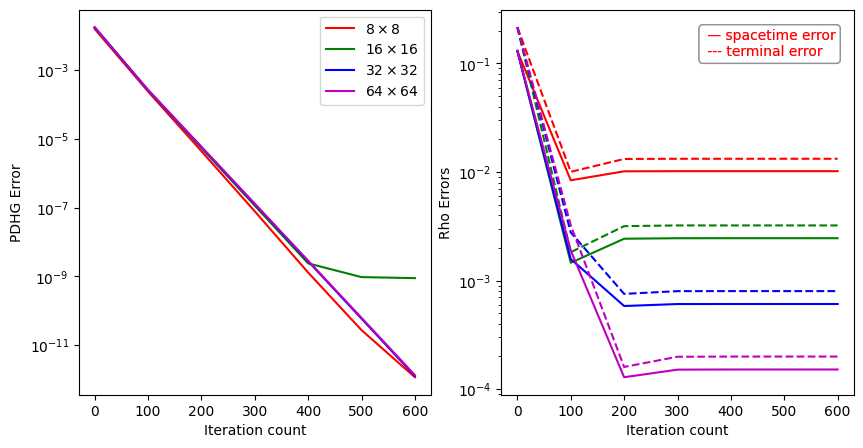

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 600
order = 1
for i in range(4):
    H1 = HEAT1D(order = order, maxIter = nIter + 1, beta = beta, nx = nx*2**i, ny = ny*2**i)
    H1.solve()
    H1.plotErr(axs,labels[i], colors[i])
    if i >0:
        print('Order (ST) = ', np.log2(err0/H1.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/H1.terminalErr[-1]))
        print("\n")
    err0 = H1.stErr[-1]
    err1 = H1.terminalErr[-1]
axs[0].legend()
plt.show()



$p=2$

Iteration:  800 PDHG error: 5.83433757e-08 spacetime error: 8.69108975e-04 terminal error 3.36808288e-04

Iteration:  800 PDHG error: 2.61579225e-08 spacetime error: 1.11582413e-04 terminal error 5.72456754e-05

Order (ST) =  2.9614274274245314
Order (Terminal) =  2.5566890258666457


Iteration:  800 PDHG error: 1.23675958e-10 spacetime error: 1.40260672e-05 terminal error 7.90219174e-06

Order (ST) =  2.9919272065269413
Order (Terminal) =  2.856841953078409


Iteration:  800 PDHG error: 4.23305835e-12 spacetime error: 1.75581339e-06 terminal error 9.86394322e-07

Order (ST) =  2.997899116766074
Order (Terminal) =  3.0020164512173544




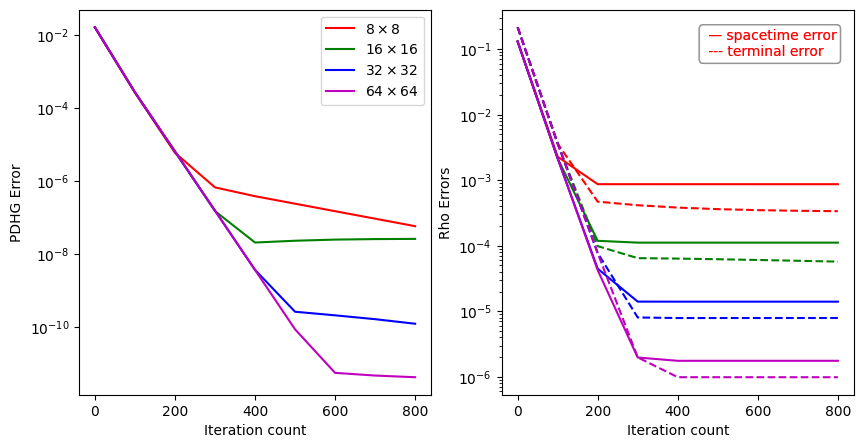

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 800
order = 2
for i in range(4):
    H2 = HEAT1D(order = order, maxIter = nIter + 1, beta = beta, nx = nx*2**i, ny = ny*2**i)
    H2.solve()
    H2.plotErr(axs,labels[i], colors[i])
    if i >0:
        print('Order (ST) = ', np.log2(err0/H2.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/H2.terminalErr[-1]))
        print("\n")
    err0 = H2.stErr[-1]
    err1 = H2.terminalErr[-1]
    
axs[0].legend()
plt.show()

$p =3$

Iteration: 1000 PDHG error: 3.38758011e-09 spacetime error: 4.18459751e-05 terminal error 2.31601661e-05

Iteration: 1000 PDHG error: 3.46601636e-11 spacetime error: 2.58337446e-06 terminal error 1.46282428e-06

Order (ST) =  4.017760186481335
Order (Terminal) =  3.98481721728404


Iteration: 1000 PDHG error: 1.54587454e-12 spacetime error: 1.60665465e-07 terminal error 9.15218676e-08

Order (ST) =  4.00712501174803
Order (Terminal) =  3.998496174238007


Iteration: 1000 PDHG error: 2.53463917e-13 spacetime error: 1.00260014e-08 terminal error 5.80294789e-09

Order (ST) =  4.002241609080521
Order (Terminal) =  3.979258614652161




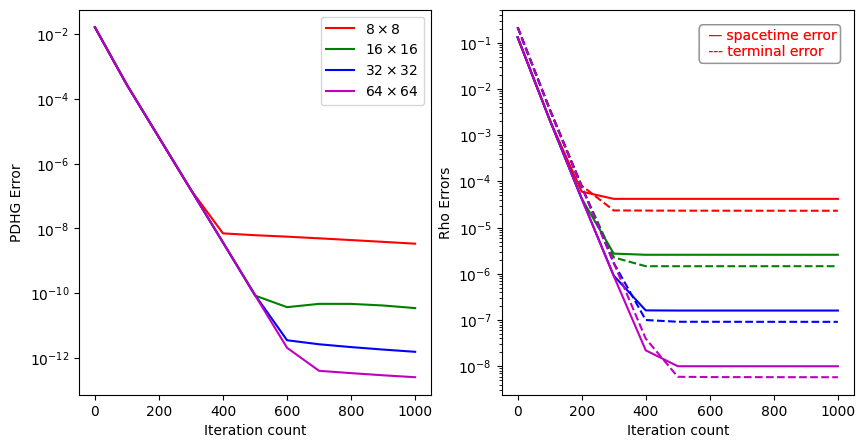

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1000
order = 3
for i in range(4):
    H3 = HEAT1D(order = order, maxIter = nIter + 1, beta = beta, nx = nx*2**i, ny = ny*2**i)
    H3.solve()
    H3.plotErr(axs, labels[i], colors[i])
    if i >0:
        print('Order (ST) = ', np.log2(err0/H3.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/H3.terminalErr[-1]))
        print("\n")
    err0 = H3.stErr[-1]
    err1 = H3.terminalErr[-1]
    
axs[0].legend()
plt.show()


# Two dimensions

## Sample solution

In [ ]:
H = HEAT2D(beta = 0.025, nx = 8, ny = 8, nz = 8, order=1)
H.solve()


## Convergence Study

In [ ]:
nx, ny, nz = 4, 4, 4
beta = 0.01

colors = ['darkorange','r','g']
labels = [r'$4\times 4 \times 4$',r'$8\times 8 \times 8$', r'$16\times 16 \times 16$']

$p=1$

Iteration:  600 PDHG error: 1.49026565e-07 spacetime error: 3.20479428e-02 terminal error 4.33291895e-02

Iteration:  600 PDHG error: 3.65471398e-07 spacetime error: 6.83709088e-03 terminal error 9.43139660e-03

Order (ST) =  2.2287772435784494
Order (Terminal) =  2.1997959246003713


Iteration:  600 PDHG error: 5.76197242e-07 spacetime error: 1.63285086e-03 terminal error 2.27978986e-03

Order (ST) =  2.065989577855424
Order (Terminal) =  2.0485705716892233




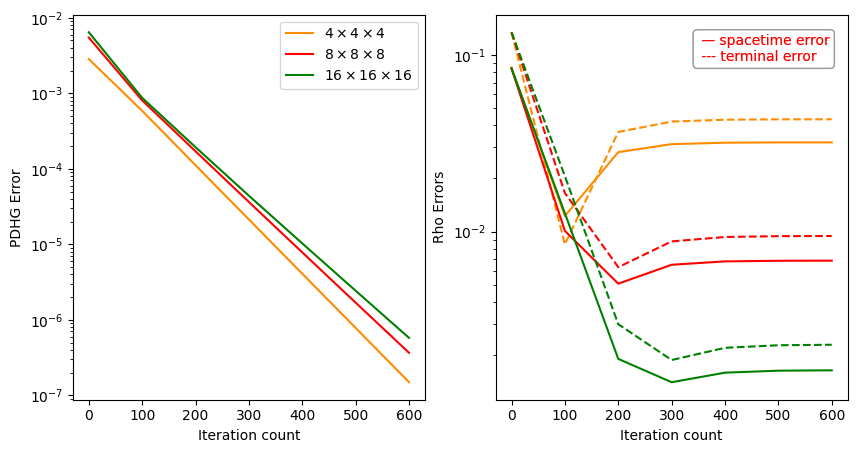

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 600
order = 1
for i in range(3):
    H21 = HEAT2D(order = order, maxIter = nIter + 1, beta = beta, nx = nx * 2 ** i, ny = ny * 2 ** i, nz = nz * 2 ** i)
    H21.solve()
    H21.plotErr(axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/H21.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/H21.terminalErr[-1]))
        print("\n")
    err0 = H21.stErr[-1]
    err1 = H21.terminalErr[-1]
    
axs[0].legend()
plt.show()


$ p = 2$

Iteration:  800 PDHG error: 1.92408325e-08 spacetime error: 5.78213461e-03 terminal error 4.39340803e-03

Iteration:  800 PDHG error: 3.42711948e-08 spacetime error: 9.19274541e-04 terminal error 5.82701593e-04

Order (ST) =  2.653034503793436
Order (Terminal) =  2.9145113335032593


Iteration:  800 PDHG error: 5.23420010e-08 spacetime error: 1.19933096e-04 terminal error 7.48578565e-05

Order (ST) =  2.9382659525544415
Order (Terminal) =  2.9605316125801306




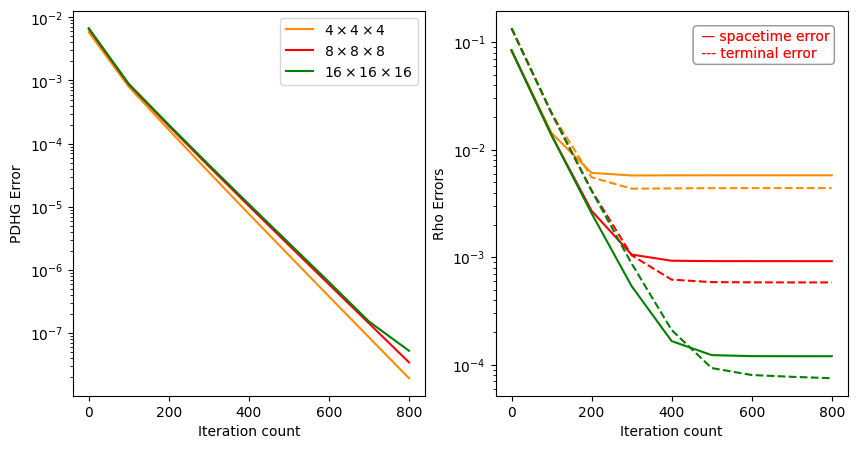

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 800
order = 2
for i in range(3):
    H22 = HEAT2D(order = order, maxIter = nIter + 1, beta = beta, nx = nx * 2 ** i, ny = ny * 2 ** i, nz = nz * 2 ** i)
    H22.solve()
    H22.plotErr(axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/H22.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/H22.terminalErr[-1]))
        print("\n")
    err0 = H22.stErr[-1]
    err1 = H22.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=3$

Iteration: 1000 PDHG error: 1.95254279e-09 spacetime error: 6.40997660e-04 terminal error 3.89553820e-04

Iteration: 1000 PDHG error: 2.46357512e-09 spacetime error: 4.28598146e-05 terminal error 2.88149951e-05

Order (ST) =  3.902621575844212
Order (Terminal) =  3.7569309849867447


Iteration: 1000 PDHG error: 2.37825559e-09 spacetime error: 2.75475192e-06 terminal error 1.81051592e-06

Order (ST) =  3.9596313025955925
Order (Terminal) =  3.9923470019611678




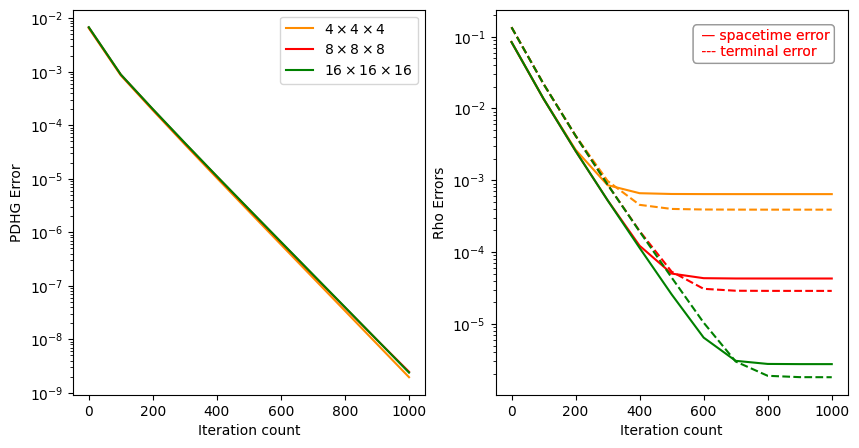

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1000
order = 3
for i in range(3):
    H23 = HEAT2D(order = order, maxIter = nIter + 1, beta = beta, nx = nx * 2 ** i, ny = ny * 2 ** i, nz = nz * 2 ** i)
    H23.solve()
    H23.plotErr(axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/H23.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/H23.terminalErr[-1]))
        print("\n")
    err0 = H23.stErr[-1]
    err1 = H23.terminalErr[-1]
    
axs[0].legend()
plt.show()
